<a href="https://colab.research.google.com/github/Kunaltembhare003/Cardiovascular-heart-diseases/blob/main/Cardiovascular_heart_diseases_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# data description

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv")

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.shape

(3390, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

The dataset contains some missing values in the education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose columns.

In [8]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390,NaN,NaN,NaN,1694.5,978.753,0,847.25,1694.5,2541.75,3389
age,3390,NaN,NaN,NaN,49.5422,8.59288,32,42,49,56,70
education,3303,NaN,NaN,NaN,1.97094,1.01908,1,1,2,3,4
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368,NaN,NaN,NaN,9.06948,11.8791,0,0,0,20,70
BPMeds,3346,NaN,NaN,NaN,0.0298864,0.170299,0,0,0,0,1
prevalentStroke,3390,NaN,NaN,NaN,0.00648968,0.0803085,0,0,0,0,1
prevalentHyp,3390,NaN,NaN,NaN,0.315339,0.464719,0,0,0,1,1
diabetes,3390,NaN,NaN,NaN,0.0256637,0.158153,0,0,0,0,1


Checking For duplication of Data.

In [11]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


# Null value treatment

In [35]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [36]:
df_copy = df.copy()

In [37]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


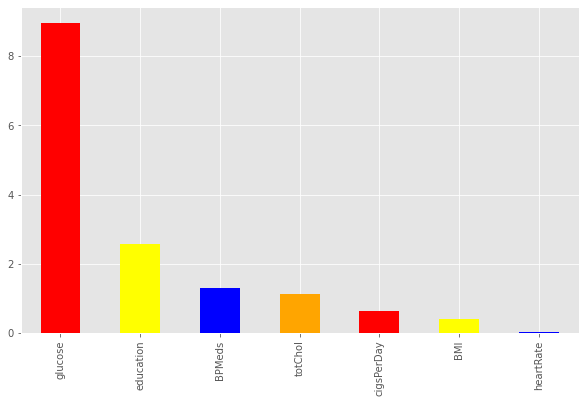

In [38]:
round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])

Glucose

In the following column mean and median are nearby. we have fill the missing values so i am using median values for filling the missing values.

In [39]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [40]:
print('Glucose Feature Missing Before')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)
df_copy['glucose']=df_copy['glucose'].fillna(df_copy['glucose'].median())
print('Glucose Feature Missing After')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)

Glucose Feature Missing Before
glucose    304
dtype: int64
----------------------------------------------------------------------------------------------------
Glucose Feature Missing After
glucose    0
dtype: int64
----------------------------------------------------------------------------------------------------


Education

In [41]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

Education feature is not a continues variable so we using Mode for filling the missing values.

In [42]:
print('Education Feature Missing Before')
print(df_copy[['education']].isnull().sum())
print('--'*50)
df_copy['education']=df_copy['education'].fillna(df_copy['education'].mode()[0])
print('Education Feature Missing After')
print(df_copy[['education']].isnull().sum())
print('--'*50)

Education Feature Missing Before
education    87
dtype: int64
----------------------------------------------------------------------------------------------------
Education Feature Missing After
education    0
dtype: int64
----------------------------------------------------------------------------------------------------


BPMeds

In [43]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [44]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [45]:
print('BPMeds Feature Missing Before')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)
df_copy['BPMeds']=df_copy['BPMeds'].fillna(df_copy['BPMeds'].mode()[0])
print('BPMeds Feature Missing After')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)

BPMeds Feature Missing Before
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
BPMeds Feature Missing After
BPMeds    0
dtype: int64
----------------------------------------------------------------------------------------------------


Total Cholostral

In [46]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [47]:
print('Total colostrol Feature Missing Before')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)
df_copy['totChol']=df_copy['totChol'].fillna(df['totChol'].median())
print('Total colostrol Feature Missing After')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)

Total colostrol Feature Missing Before
totChol    38
dtype: int64
----------------------------------------------------------------------------------------------------
Total colostrol Feature Missing After
totChol    0
dtype: int64
----------------------------------------------------------------------------------------------------


Cigrates per Day

In [48]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [49]:
print('Cigars per day Feature Missing Before')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)
df_copy['cigsPerDay']=df_copy['cigsPerDay'].fillna(df['cigsPerDay'].median())
print('Cigars per day Feature Missing After')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)

Cigars per day Feature Missing Before
cigsPerDay    22
dtype: int64
----------------------------------------------------------------------------------------------------
Cigars per day Feature Missing After
cigsPerDay    0
dtype: int64
----------------------------------------------------------------------------------------------------


Body Mass Index(BMI)

In [50]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [51]:
print('BMI Feature Missing Before')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)
df_copy['BMI']=df_copy['BMI'].fillna(df['BMI'].median())
print('BMI Feature Missing After')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)

BMI Feature Missing Before
BMI    14
dtype: int64
----------------------------------------------------------------------------------------------------
BMI Feature Missing After
BMI    0
dtype: int64
----------------------------------------------------------------------------------------------------


Heart rate

In [52]:
df_copy['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [53]:
print('Heart Rate Feature Missing Before')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)
df_copy['heartRate']=df_copy['heartRate'].fillna(df['heartRate'].median())
print('Heart Rate Feature Missing After')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)

Heart Rate Feature Missing Before
heartRate    1
dtype: int64
----------------------------------------------------------------------------------------------------
Heart Rate Feature Missing After
heartRate    0
dtype: int64
----------------------------------------------------------------------------------------------------


Null valuve after treatment

In [54]:
df_copy.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#univariant analysis

In [55]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae96f5c050>,
      dtype=object)

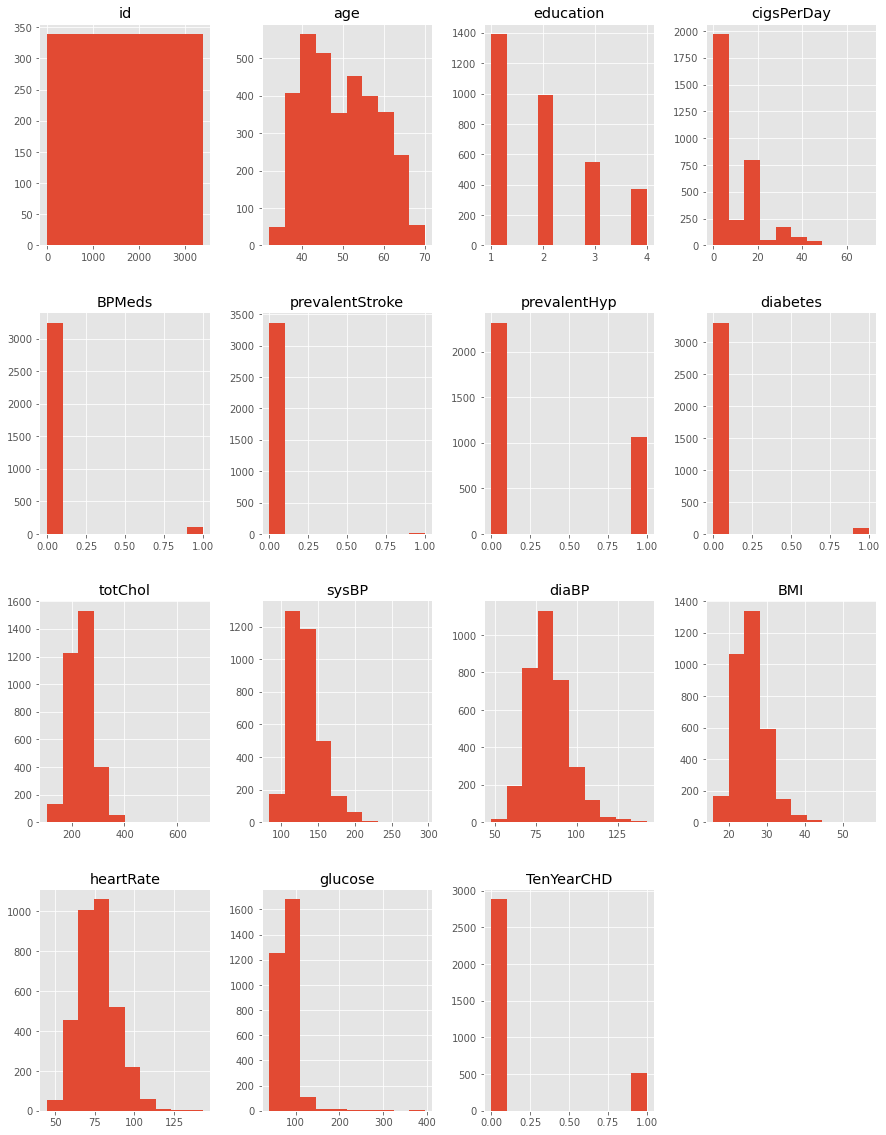

In [56]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

##column 2: age 

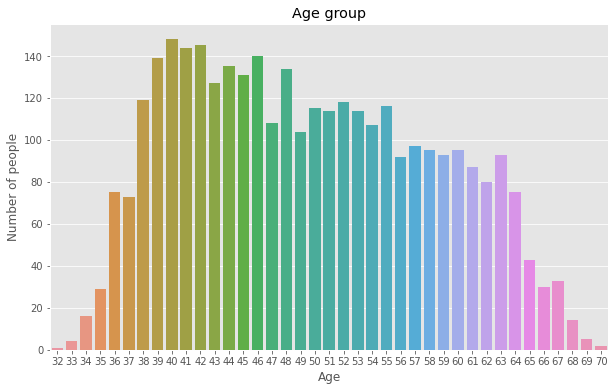

In [57]:
sns.countplot(df_copy.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

##coloum 3: education

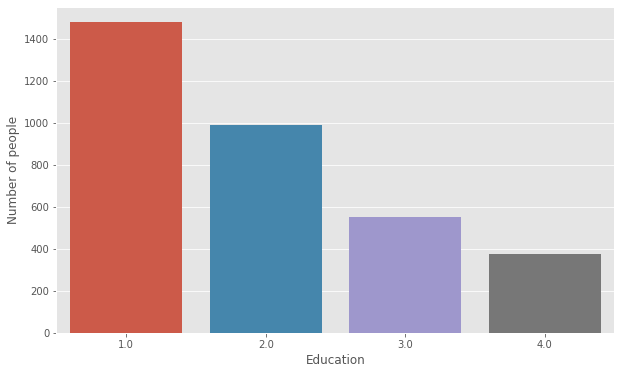

In [58]:
sns.countplot(df_copy.education)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.show()

##column : is smoking

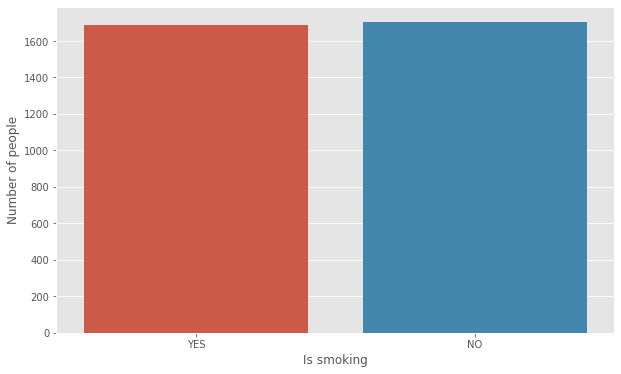

In [59]:
sns.countplot(df_copy.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

##column 4: CigsperDay

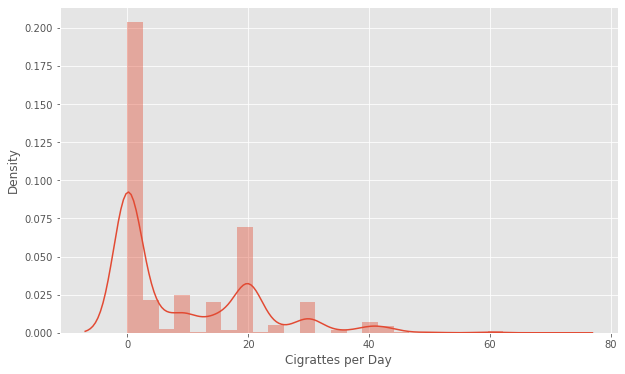

In [60]:
sns.distplot(df_copy.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

After log treatment

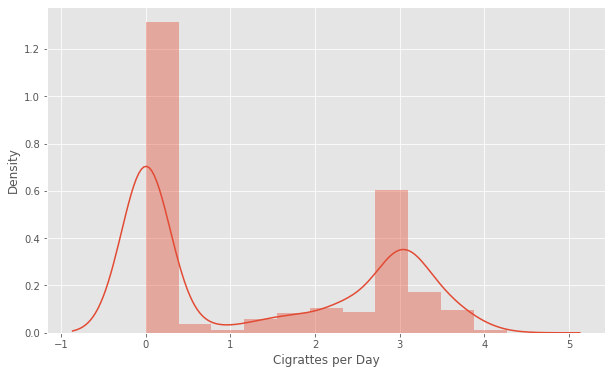

In [61]:
sns.distplot(np.log1p(df_copy.cigsPerDay))
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

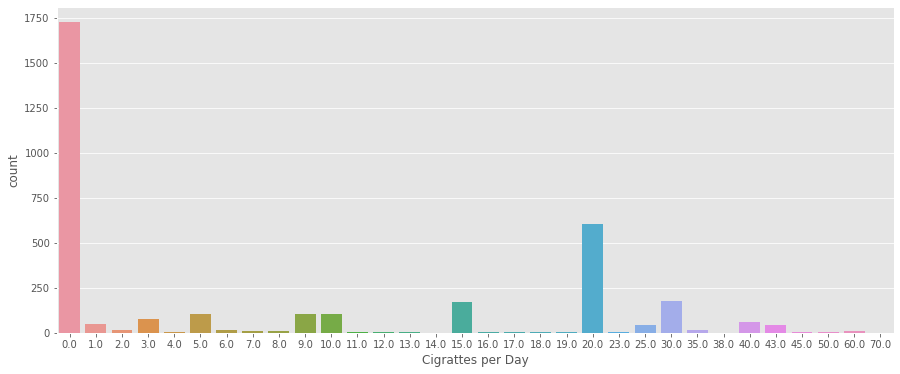

In [62]:
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(df_copy.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

##coloumn 5: BPmeds

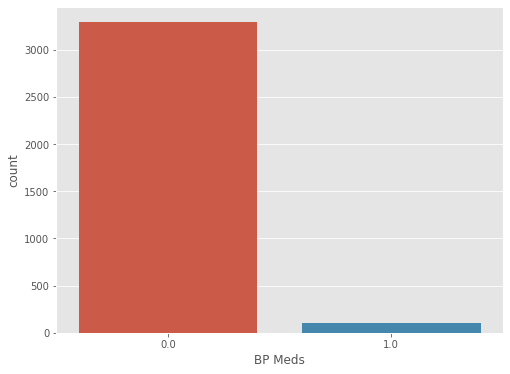

In [63]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(df_copy.BPMeds)
plt.xlabel("BP Meds")
plt.show()

##column 6: Prevalent Strokes

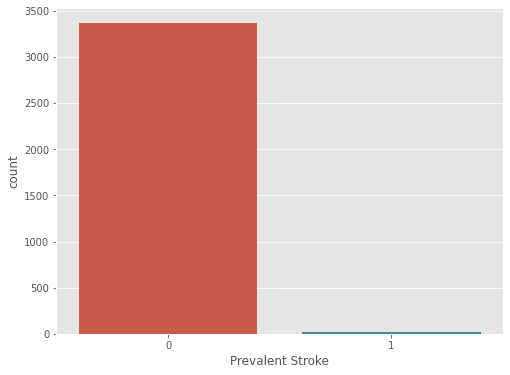

In [64]:
sns.countplot(df_copy.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

##column 7: Prevalent hyp

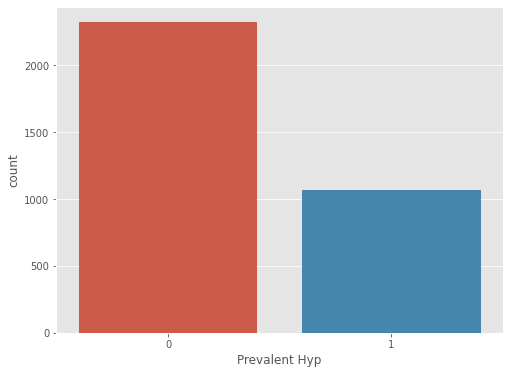

In [65]:
sns.countplot(df_copy.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

##columns 8: Diabetes

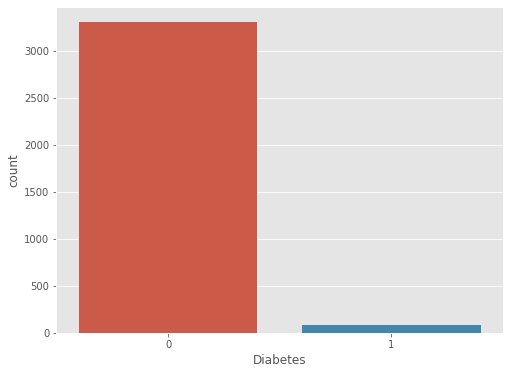

In [66]:
sns.countplot(df_copy.diabetes)
plt.xlabel("Diabetes")
plt.show()

## Columns 9: totChol

In [67]:
df_copy.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean      237.039823
std        44.994205
min       107.000000
50%       234.000000
75%       264.000000
90%       292.000000
95%       313.000000
99%       355.110000
max       696.000000
Name: totChol, dtype: float64

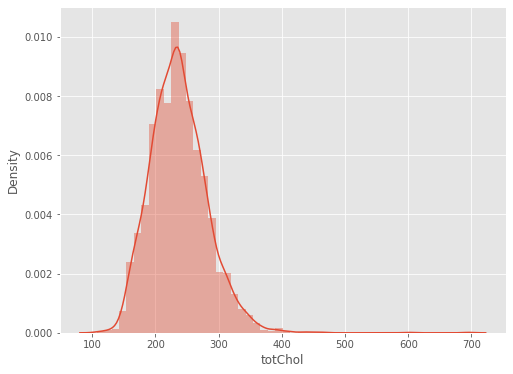

In [68]:
sns.distplot(df_copy.totChol )
plt.xlabel("totChol")
plt.show()

##column 9: sysBP

In [69]:
df_copy.sysBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
50%       128.50000
75%       144.00000
90%       162.50000
95%       175.27500
99%       202.05500
max       295.00000
Name: sysBP, dtype: float64

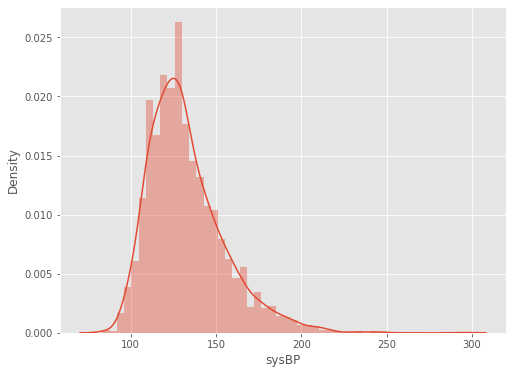

In [70]:
sns.distplot(df_copy.sysBP )
plt.xlabel("sysBP")
plt.show()

##columns 10: diaBP

In [71]:
df_copy.diaBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
50%        82.000000
75%        90.000000
90%        98.000000
95%       105.000000
99%       119.110000
max       142.500000
Name: diaBP, dtype: float64

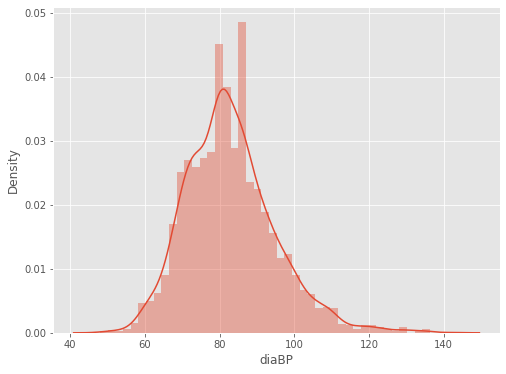

In [72]:
sns.distplot(df_copy.diaBP )
plt.xlabel("diaBP")
plt.show()

##coloumn 11: BMI

In [73]:
df_copy.BMI.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       25.793251
std         4.107026
min        15.960000
50%        25.380000
75%        27.997500
90%        30.851000
95%        32.840000
99%        38.835400
max        56.800000
Name: BMI, dtype: float64

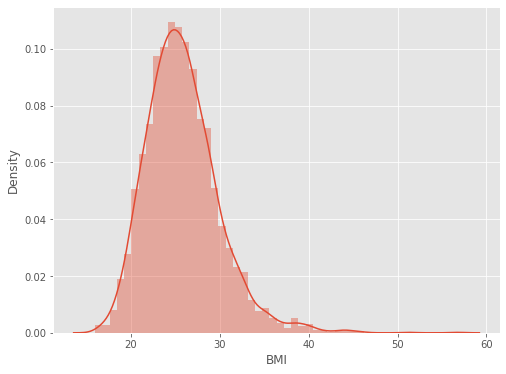

In [74]:
sns.distplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

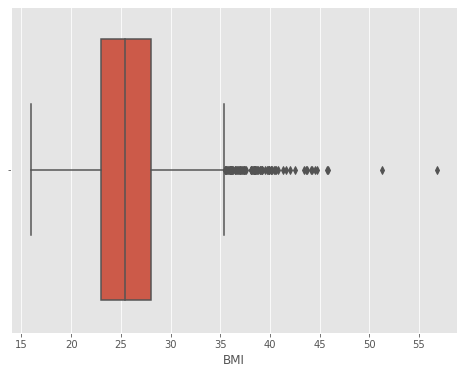

In [75]:
sns.boxplot(df_copy.BMI )
plt.xlabel("BMI")
plt.show()

##column 12: HeartRate

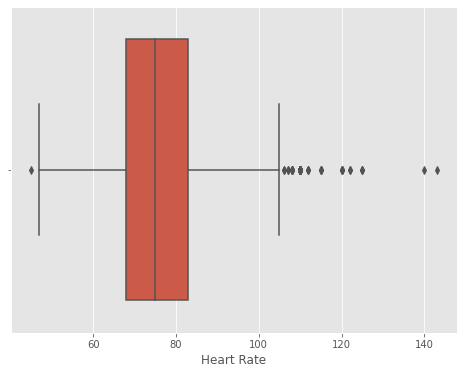

In [76]:
sns.boxplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

In [77]:
df_copy.heartRate.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       75.976991
std        11.970114
min        45.000000
50%        75.000000
75%        83.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64

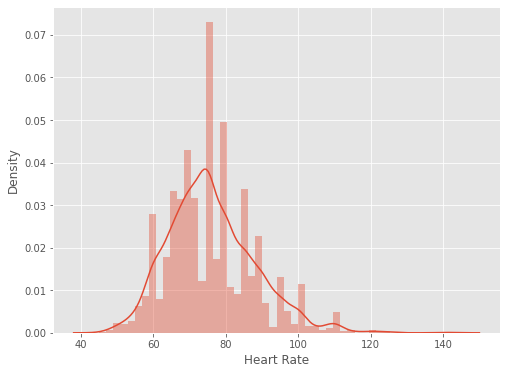

In [78]:
sns.distplot(df_copy.heartRate )
plt.xlabel("Heart Rate")
plt.show()

##column 13: Glucose

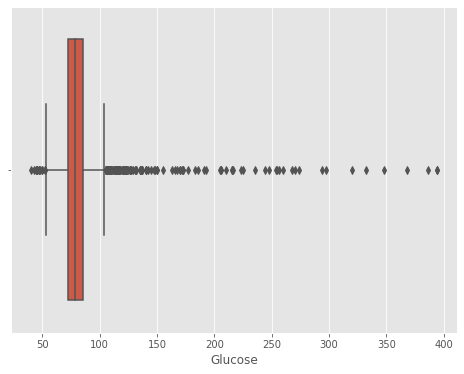

In [79]:
sns.boxplot(df_copy.glucose )
plt.xlabel("Glucose")
plt.show()

In [80]:
df_copy.glucose.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       81.720059
std        23.161265
min        40.000000
50%        78.000000
75%        85.000000
90%        97.000000
95%       108.000000
99%       173.000000
max       394.000000
Name: glucose, dtype: float64

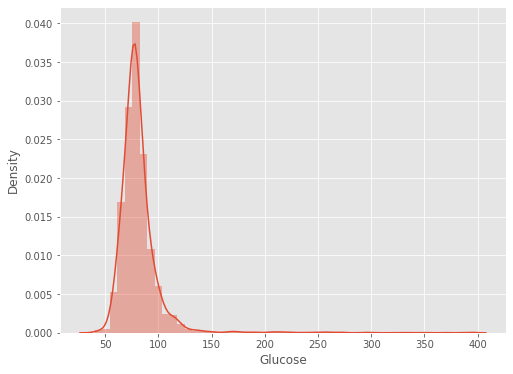

In [81]:
sns.distplot(df_copy.glucose)
plt.xlabel("Glucose")
plt.show()

##column 14: TenyearCHD

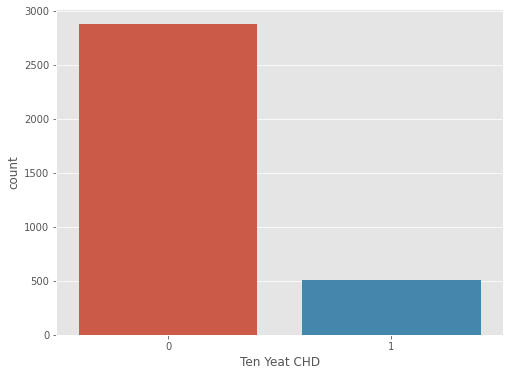

In [82]:
sns.countplot(df_copy.TenYearCHD)
plt.xlabel("Ten Yeat CHD")
plt.show()

observation;- Slightly more males are suffering from CHD than females.

The percentage of people who have CHD is almost equal between smokers and non smokers.

The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.

A larger percentage of the people who have CHD are on blood pressure medication.


#bivariant analysis

## Age Vs TenYearCHD

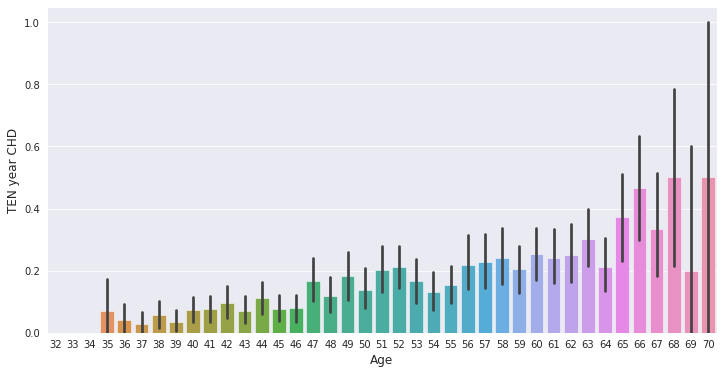

In [83]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (12,6))
sns.barplot(df_copy.age,df_copy.TenYearCHD)
plt.xlabel('Age')
plt.ylabel('TEN year CHD')
plt.show()

## educaation Vs Ten Year CHD

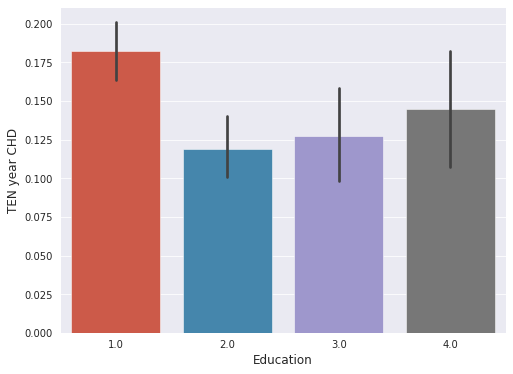

In [84]:


sns.barplot(df_copy.education,df_copy.TenYearCHD)
plt.xlabel('Education')
plt.ylabel('TEN year CHD')
plt.show()



## sex Vs Ten Year CHD

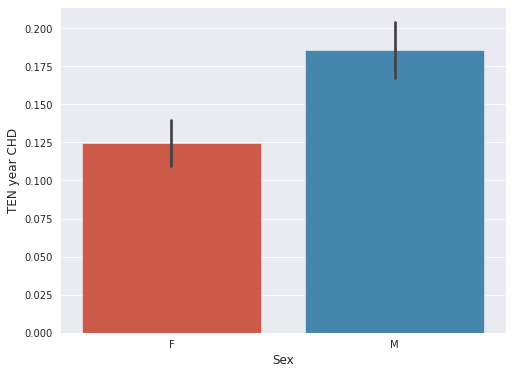

In [85]:
sns.barplot(df_copy.sex,df_copy.TenYearCHD)
plt.xlabel('Sex')
plt.ylabel('TEN year CHD')
plt.show()

## is_smoking Vs Ten year CHD

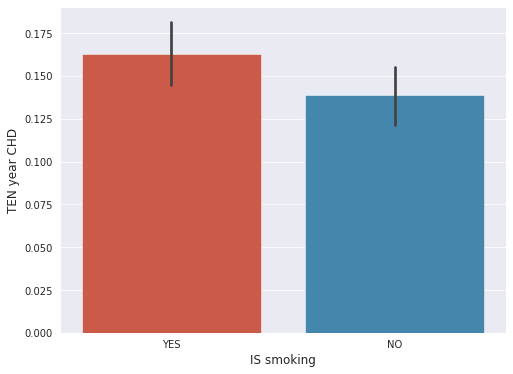

In [86]:
sns.barplot(df_copy.is_smoking,df_copy.TenYearCHD)
plt.xlabel('IS smoking')
plt.ylabel('TEN year CHD')
plt.show()

##cigratesperday Vs Ten year CHD

Text(0.5, 1.0, 'Line Plot')

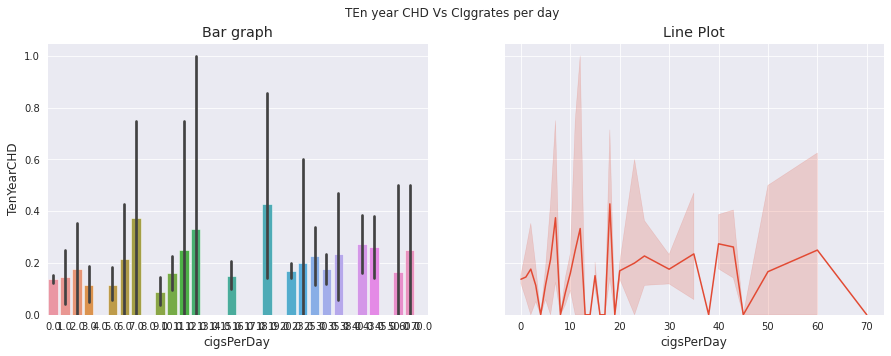

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('TEn year CHD Vs CIggrates per day')

sns.barplot(ax=axes[0], x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1],  x='cigsPerDay',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

## BPMeds Vs TenYearCHD

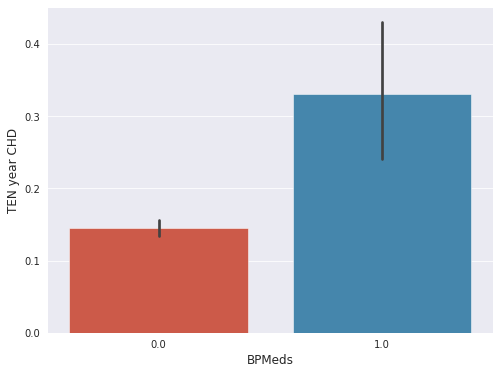

In [88]:


df.columns

sns.barplot(df_copy.BPMeds,df_copy.TenYearCHD)
plt.xlabel('BPMeds')
plt.ylabel('TEN year CHD')
plt.show()

## prevalentStrokes Vs TenYearCHD

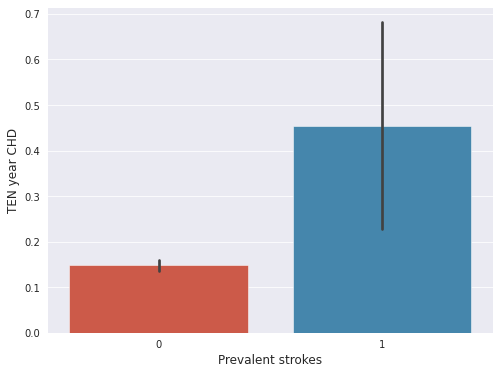

In [89]:


sns.barplot(df_copy.prevalentStroke,df_copy.TenYearCHD)
plt.xlabel('Prevalent strokes')
plt.ylabel('TEN year CHD')
plt.show()

##prevalentHyp Vs TenYearCHD

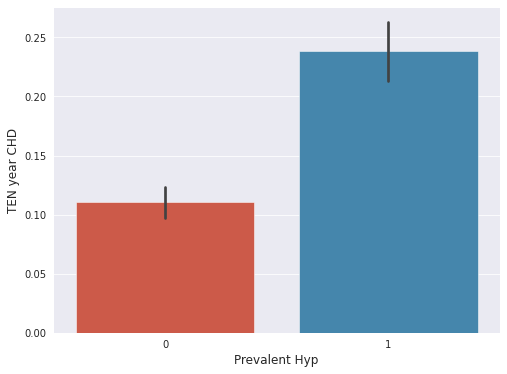

In [90]:


sns.barplot(df_copy.prevalentHyp,df_copy.TenYearCHD)
plt.xlabel('Prevalent Hyp')
plt.ylabel('TEN year CHD')
plt.show()

##diabetes Vs TenYearCHD

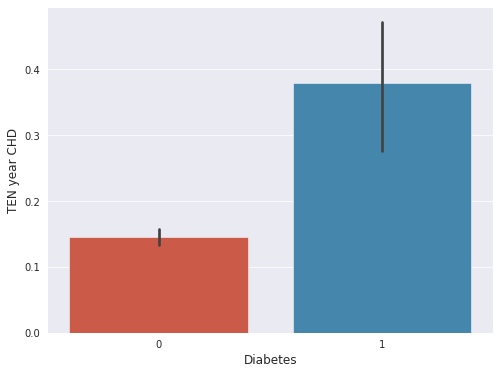

In [91]:


sns.barplot(df_copy.diabetes,df_copy.TenYearCHD)
plt.xlabel('Diabetes')
plt.ylabel('TEN year CHD')
plt.show()

## TOTChol Vs TenYearCHD


Text(0.5, 1.0, 'Line Plot')

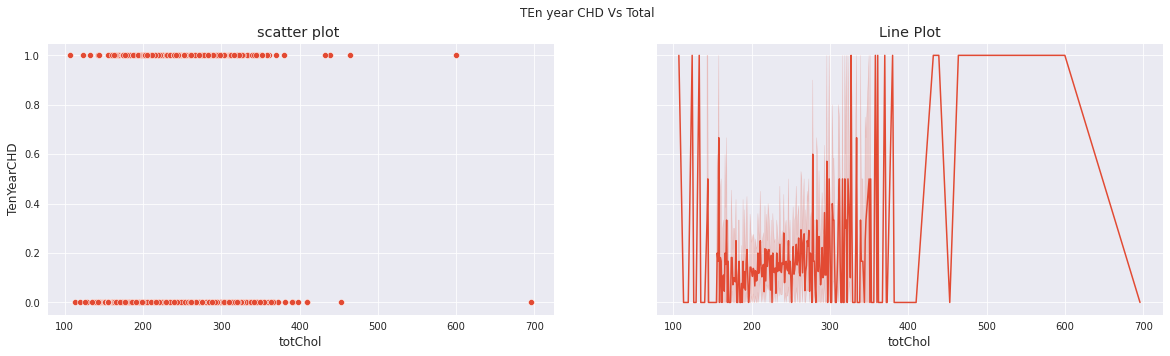

In [92]:

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs Total')

sns.scatterplot(ax=axes[0], x='totChol',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='totChol',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

##sysBP Vs TenYearCHD

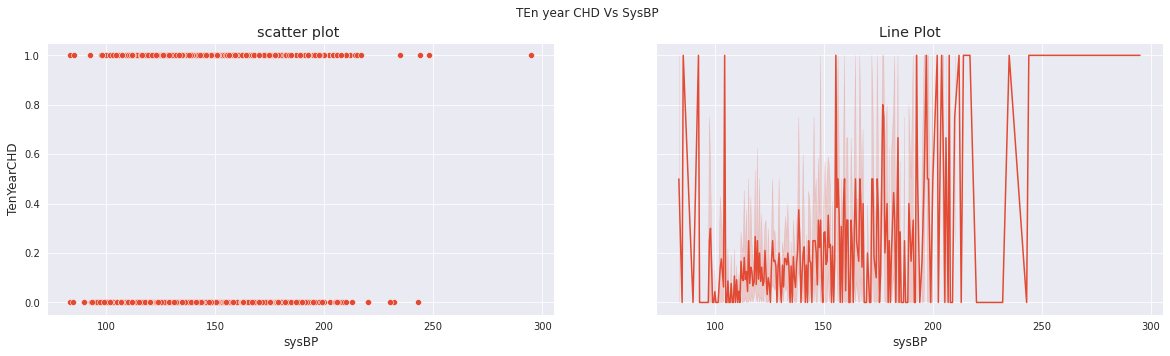

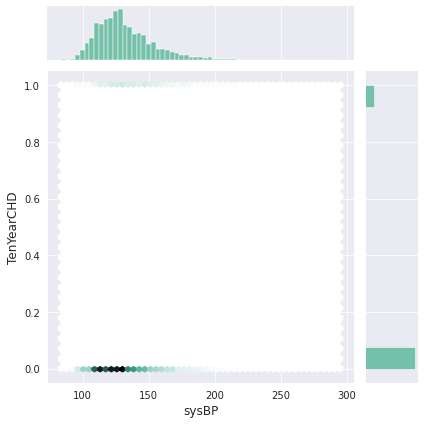

In [93]:


df.sysBP.describe()

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs SysBP')

sns.scatterplot(ax=axes[0], x='sysBP',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='sysBP',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")


##diaBP Vs TenYearCHD

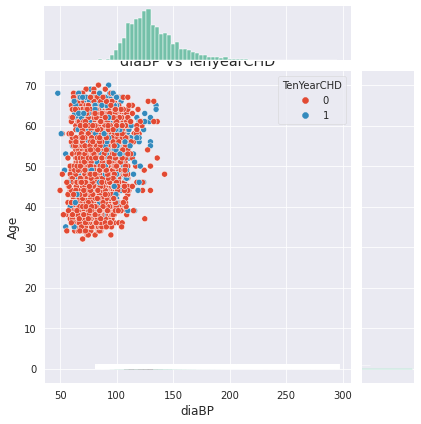

In [94]:


sns.jointplot(x=df_copy.sysBP, y=df_copy.TenYearCHD, kind="hex", color="#4CB391")
plt.title('joint plot ')

sns.scatterplot(x = "diaBP", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('diaBP')
plt.ylabel('Age')
plt.title("diaBP Vs TenyearCHD")
plt.show()

##BMI Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

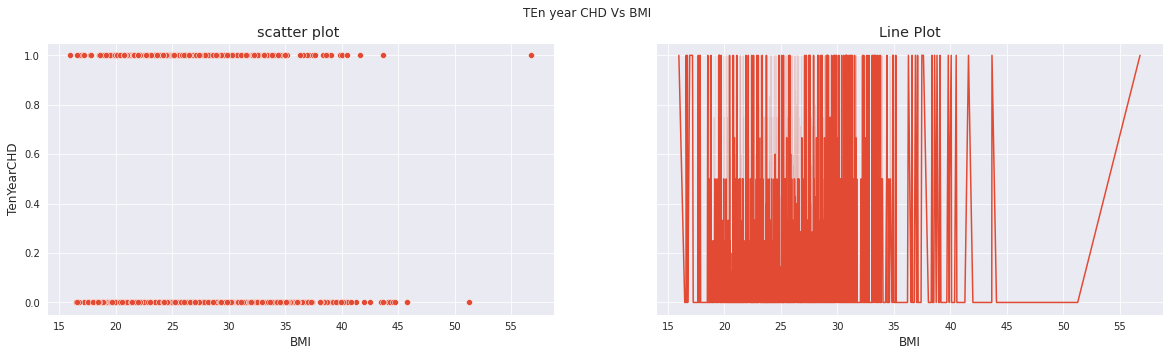

In [95]:


fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs BMI')

sns.scatterplot(ax=axes[0], x='BMI',y='TenYearCHD',data=df_copy)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='BMI',y='TenYearCHD',data=df_copy)
axes[1].set_title('Line Plot')

##BMI Vs TenYearCHD

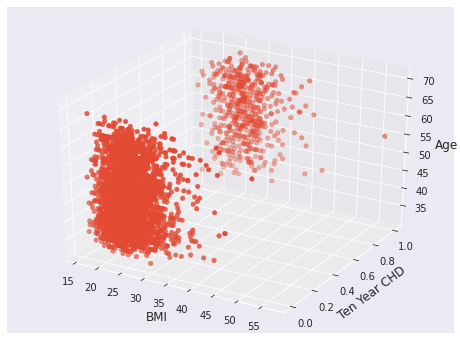

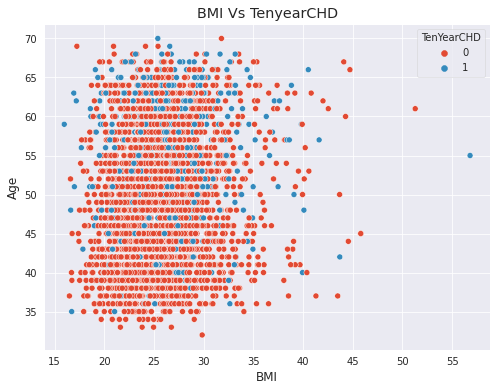

In [96]:


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


ax.scatter(df_copy.BMI, df_copy.TenYearCHD, df_copy.age)
ax.set_xlabel("BMI")
ax.set_ylabel("Ten Year CHD")
ax.set_zlabel("Age")

plt.show()


sns.scatterplot(x = "BMI", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title("BMI Vs TenyearCHD")
plt.show()

## heartRate Vs TenYearCHD

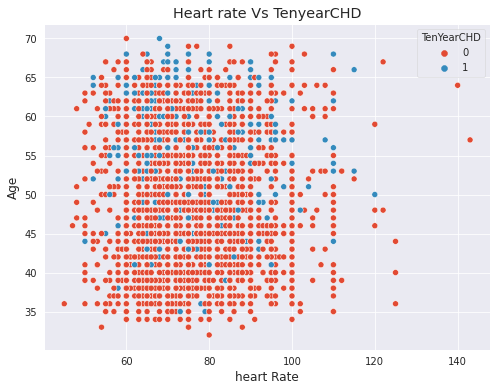

In [97]:


sns.scatterplot(x = "heartRate", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('heart Rate')
plt.ylabel('Age')
plt.title("Heart rate Vs TenyearCHD")
plt.show()

##  Glucose Vs TenYearCHD

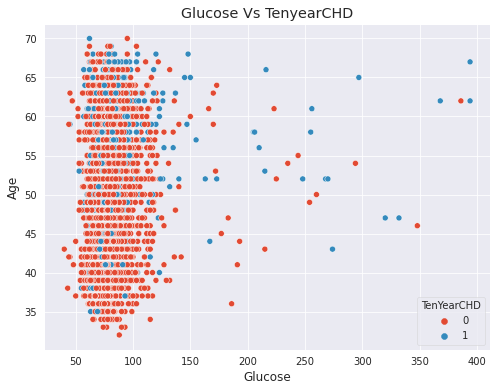

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [98]:


sns.scatterplot(x = "glucose", y = "age",data=df_copy, hue='TenYearCHD')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title("Glucose Vs TenyearCHD")
plt.show()

df.columns

# Corealtion

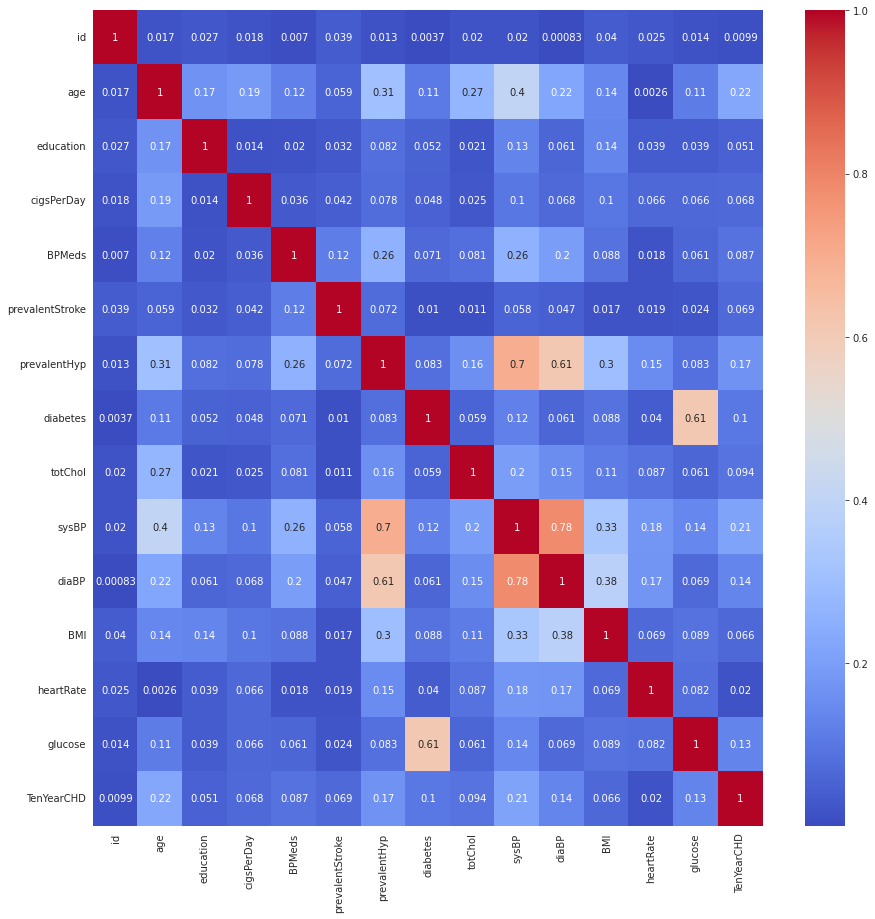

In [99]:
 ## Correlation
plt.figure(figsize=(15,15))
correlation = df_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

# label encoding and feature selection

In [100]:
le=LabelEncoder()
df_copy['sex']=le.fit_transform(df_copy['sex'])
df_copy['is_smoking']=le.fit_transform(df_copy['is_smoking'])

In [101]:
df_copy.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [102]:
df_copy.drop(['id'],axis=1,inplace=True) #Id is not useful for Model training.

In [103]:
final_data = df_copy.copy()

In [104]:
# One hot encoding
final_data = pd.get_dummies(df_copy, columns=["education", "cigsPerDay"])

In [105]:
final_data.head()

,age,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_0.0,cigsPerDay_1.0,cigsPerDay_2.0,cigsPerDay_3.0,cigsPerDay_4.0,cigsPerDay_5.0,cigsPerDay_6.0,cigsPerDay_7.0,cigsPerDay_8.0,cigsPerDay_9.0,cigsPerDay_10.0,cigsPerDay_11.0,cigsPerDay_12.0,cigsPerDay_13.0,cigsPerDay_14.0,cigsPerDay_15.0,cigsPerDay_16.0,cigsPerDay_17.0,cigsPerDay_18.0,cigsPerDay_19.0,cigsPerDay_20.0,cigsPerDay_23.0,cigsPerDay_25.0,cigsPerDay_30.0,cigsPerDay_35.0,cigsPerDay_38.0,cigsPerDay_40.0,cigsPerDay_43.0,cigsPerDay_45.0,cigsPerDay_50.0,cigsPerDay_60.0,cigsPerDay_70.0
0,64,0,1,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,1,0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46,0,1,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,1,1,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,64,0,1,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [106]:
final_data.shape

(3390, 50)

Now we see corelation heatmap between each feature to choose best feature.

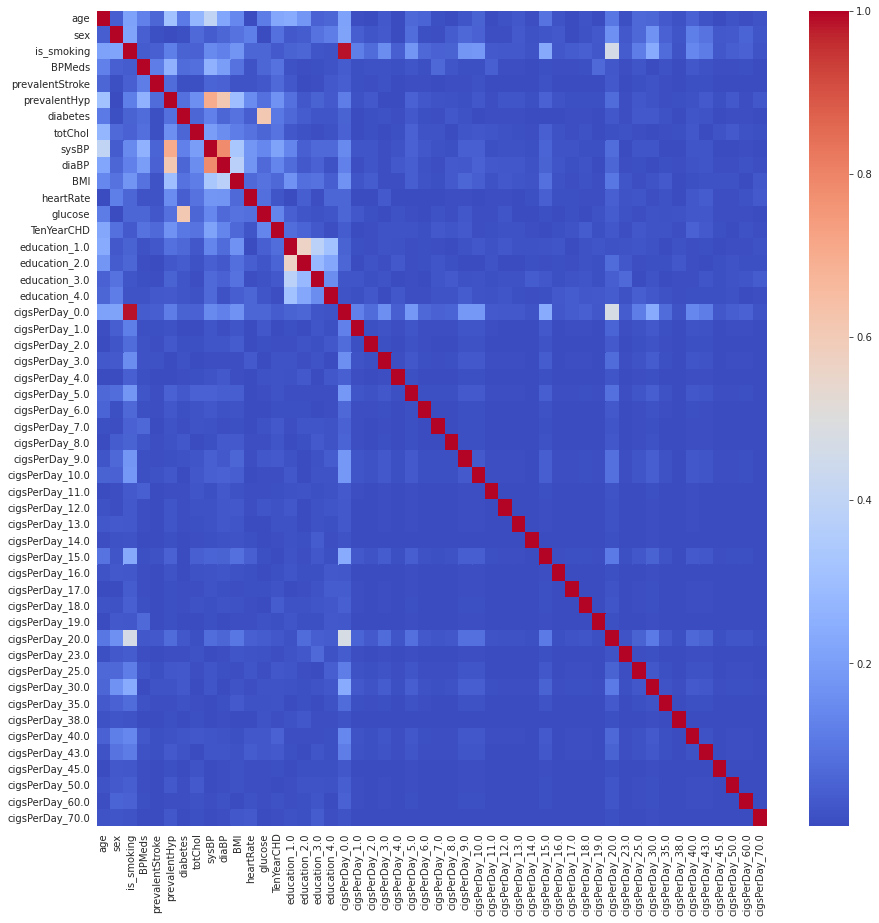

In [107]:
## Correlation
plt.figure(figsize=(15,15))
correlation_1 = final_data.corr()
sns.heatmap(abs(correlation_1), cmap='coolwarm')
plt.show()

#splitting data into train and test

In [108]:
# Data for all the independent variables
X = final_data.drop(labels='TenYearCHD',axis=1)

# Data for the dependent variable
y = final_data['TenYearCHD']

In [109]:
print(f'dimension of independent variable X is {X.shape}')
print(f'dimension of dependent variable Y is {y.shape}')

dimension of independent variable X is (3390, 49)
dimension of dependent variable Y is (3390,)


## data imbalance

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_sm, y_sm = smote.fit_resample(X, y)

In [111]:
y_sm=pd.DataFrame(y_sm)

In [112]:
y_sm.value_counts()

TenYearCHD
1             2879
0             2879
dtype: int64

##spilt data

In [113]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm , test_size = 0.2, random_state = 0) 
print(f'dimension of train set {X_train.shape}')
print(f'dimension of test set {X_test.shape}')

dimension of train set (4606, 49)
dimension of test set (1152, 49)


In [114]:
print(f'dimension of y_train set {y_train.shape}')
print(f'dimension of Y_test set {y_test.shape}')

dimension of y_train set (4606, 1)
dimension of Y_test set (1152, 1)


# function


In [195]:
train_accuracy = []
test_accuracy = []
precision_train = []
precision_test= []
Recall_train= []
Recall_test = []
f1_score_train = []
f1_score_test = []
ROC_AUC_test = []

def validation_matrix(y_train, train_preds, y_test, test_preds, test_pred_pro, model_name="Not assigned"):
  train_accuracy_1 = accuracy_score(train_preds,y_train)
  test_accuracy_1 = accuracy_score(test_preds,y_test)
  precision_train_1 = precision_score(y_train, train_preds)
  precision_test_1 = precision_score(y_test, test_preds)
  recall_score_train = recall_score(y_train, train_preds)
  recall_score_test = recall_score(y_test, test_preds)
  f1_score_train1 = f1_score(y_train, train_preds)
  f1_score_test1 = f1_score(y_test, test_preds)
  roc_auc = roc_auc_score(y_test,test_pred_pro)
  print(f'scoring matrix for {model_name}')
  print("="*20)
  print("The accuracy on train data is ", round(train_accuracy_1,3))
  print("The accuracy on test data is ", round(test_accuracy_1,3))
  print("The precision on train data is ", round(precision_train_1,3))
  print("The precision on test data is ", round(precision_test_1,3))
  print("The recall on train data is ", round(recall_score_train,3))
  print("The recall on test data is ", round(recall_score_test,3))
  print("The f1-score on train data is ", round(f1_score_train1,3))
  print("The f1-score on test data is ", round(f1_score_test1,3))
  print(f' ROC AUC score: {round(roc_auc,3)}')

  train_accuracy.append(round(train_accuracy_1,3))
  test_accuracy.append(round(test_accuracy_1,3))
  precision_train.append(round(precision_train_1,3))
  precision_test.append(round(precision_test_1,3))
  Recall_train.append(round(recall_score_train,3))
  Recall_test.append(round(recall_score_test,3))
  f1_score_train.append(round(f1_score_train1,3))
  f1_score_test.append(round(f1_score_test1,3))
  ROC_AUC_test.append(round(roc_auc,3))
  

# model building

## logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True,max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [118]:
# Get the predicted probabilities
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [119]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8703864524533218
The accuracy on test data is  0.8524305555555556


In [120]:
# Get the confusion matrix for  train 
confusion_matrix(y_train, train_preds)


array([[2243,   83],
       [ 514, 1766]])

In [122]:
# Get the confusion matrix for  test
confusion_matrix(y_test, test_preds)


array([[527,  26],
       [144, 455]])

In [126]:
y_lr_predict_pro=lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_predict_pro)


In [196]:
validation_matrix(y_train, train_preds,
                  y_test, test_preds,
                  y_lr_predict_pro,
                  model_name = "logistic Regression")

scoring matrix for logistic Regression
The accuracy on train data is  0.87
The accuracy on test data is  0.852
The precision on train data is  0.955
The precision on test data is  0.946
The recall on train data is  0.775
The recall on test data is  0.76
The f1-score on train data is  0.855
The f1-score on test data is  0.843
 ROC AUC score: 0.919


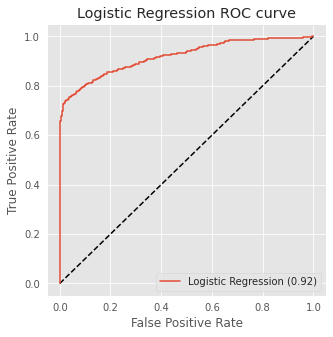

In [167]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr, label='Logistic Regression (%0.2f)' % roc_auc_score(y_test,y_lr_predict_pro))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

In [144]:
precision_lr, recall_lr, thresholds = precision_recall_curve(y_test,y_lr_predict_pro)

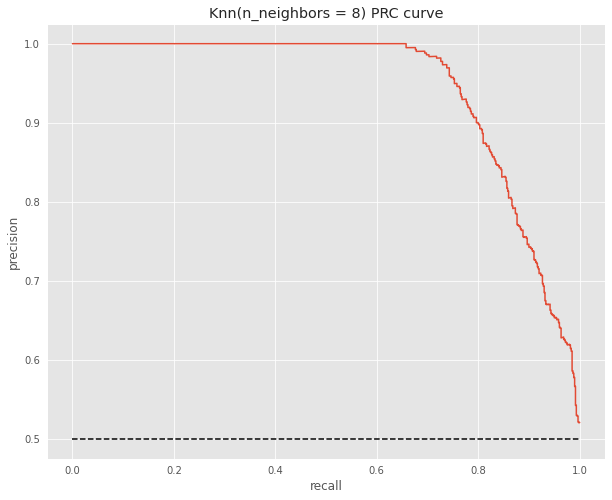

In [145]:
#precision & recall
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall_lr, precision_lr, label = 'Logistic regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

## Decision Tree Classifier

In [147]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

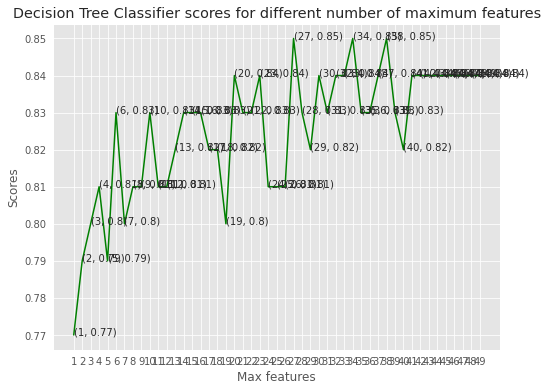

In [148]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [151]:
y_dt_predict_train = dt_classifier.predict(X_train)
y_dt_predict_test = dt_classifier.predict(X_test)

In [152]:
y_dt_predict_pro=dt_classifier.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_predict_pro)

In [197]:
validation_matrix(y_train, y_dt_predict_train,
                  y_test, y_dt_predict_test,
                  y_dt_predict_pro,
                  model_name = "Decision tree")

scoring matrix for Decision tree
The accuracy on train data is  1.0
The accuracy on test data is  0.843
The precision on train data is  1.0
The precision on test data is  0.849
The recall on train data is  1.0
The recall on test data is  0.848
The f1-score on train data is  1.0
The f1-score on test data is  0.849
 ROC AUC score: 0.843


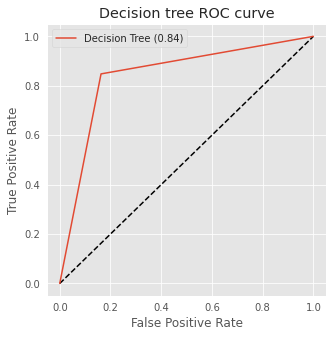

In [168]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_dt,tpr_dt, label='Decision Tree (%0.2f)' % roc_auc_score(y_test,y_dt_predict_pro))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC curve')
plt.legend()
plt.show()

In [169]:
features = X.columns
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)

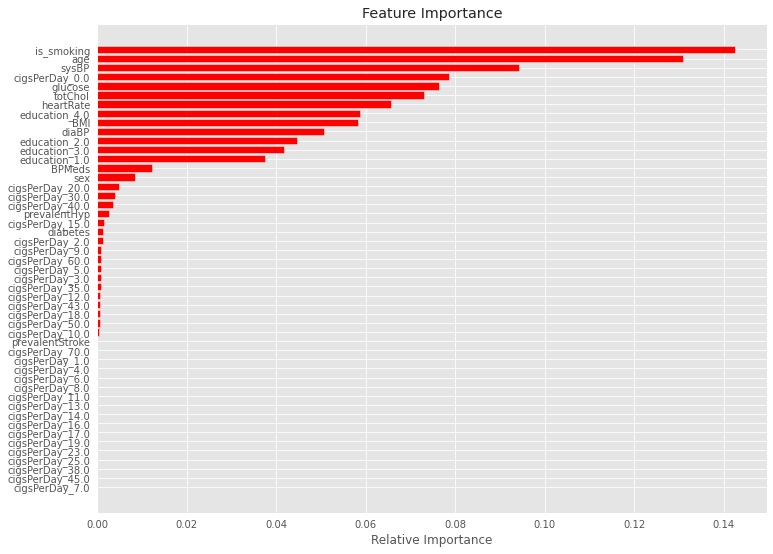

In [170]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random forest

In [172]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [173]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_


{'max_depth': 12, 'n_estimators': 120}

In [174]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=120)

In [175]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [176]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_predict_pro)

In [198]:
validation_matrix(y_train, y_train_preds_rf,
                  y_test, y_test_preds_rf,
                  y_rf_predict_pro,
                  model_name = "Random forest")

scoring matrix for Random forest
The accuracy on train data is  0.967
The accuracy on test data is  0.866
The precision on train data is  0.981
The precision on test data is  0.913
The recall on train data is  0.952
The recall on test data is  0.821
The f1-score on train data is  0.967
The f1-score on test data is  0.865
 ROC AUC score: 0.947


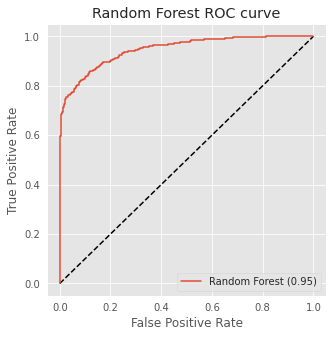

In [178]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest (%0.2f)' % roc_auc_score(y_test,y_rf_predict_pro))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()

### feature importance

In [179]:
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

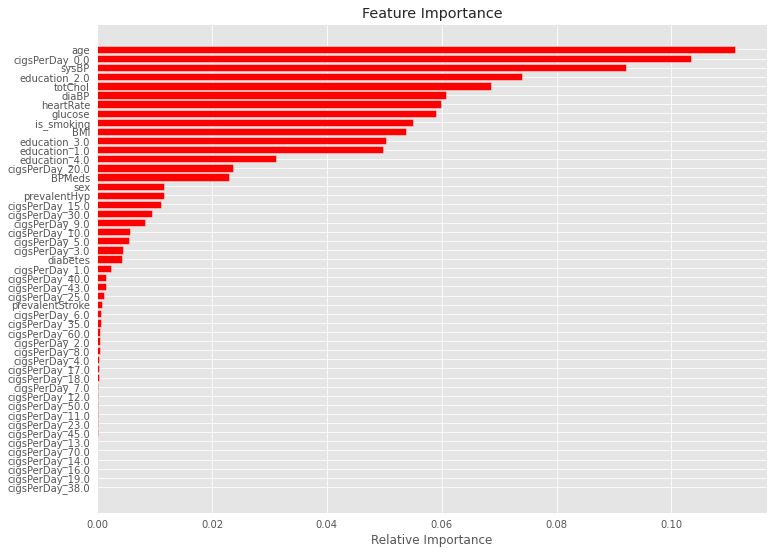

In [180]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## KNN

In [181]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [182]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [183]:
bestPermet=knn_cv.best_params_
knn_cv.best_params_

{'n_neighbors': 2}

In [184]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

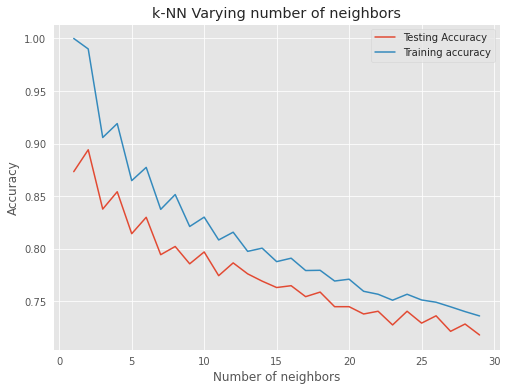

In [185]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [186]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=bestPermet['n_neighbors'])

In [187]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [188]:
knn.score(X_test,y_test)

0.8940972222222222

In [189]:
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

In [190]:
#confusion matrix for train set
confusion_matrix(y_train,y_train_pred_knn)

array([[2326,    0],
       [  46, 2234]])

In [191]:
#confusion matrix for test set
confusion_matrix(y_test,y_test_pred_knn)

array([[470,  83],
       [ 39, 560]])

In [192]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [199]:
validation_matrix(y_train, y_train_pred_knn ,
                  y_test, y_test_pred_knn ,
                  y_pred_proba ,
                  model_name = "KNN")

scoring matrix for KNN
The accuracy on train data is  0.99
The accuracy on test data is  0.894
The precision on train data is  1.0
The precision on test data is  0.871
The recall on train data is  0.98
The recall on test data is  0.935
The f1-score on train data is  0.99
The f1-score on test data is  0.902
 ROC AUC score: 0.909


In [200]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba)

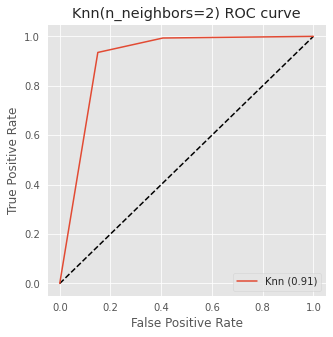

In [201]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn, label='Knn (%0.2f)' % roc_auc_score(y_test,y_pred_proba))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.legend()
plt.show()

##SVM

In [203]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

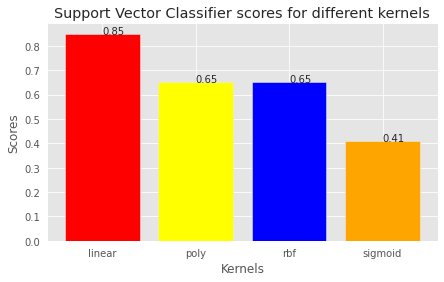

In [204]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [205]:
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [206]:
y_svm_predi_train=svm.predict(X_train)
y_svm_predi_test=svm.predict(X_test)

In [207]:
confusion_matrix(y_train,y_svm_predi_train)

array([[1530,  796],
       [ 833, 1447]])

In [208]:
confusion_matrix(y_test,y_svm_predi_test)

array([[349, 204],
       [194, 405]])

In [209]:
y_svm_predict_pro=svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_svm_predict_pro)

In [210]:
validation_matrix(y_train, y_svm_predi_train ,
                  y_test, y_svm_predi_test ,
                  y_svm_predict_pro,
                  model_name = "SVM")

scoring matrix for SVM
The accuracy on train data is  0.646
The accuracy on test data is  0.655
The precision on train data is  0.645
The precision on test data is  0.665
The recall on train data is  0.635
The recall on test data is  0.676
The f1-score on train data is  0.64
The f1-score on test data is  0.671
 ROC AUC score: 0.702


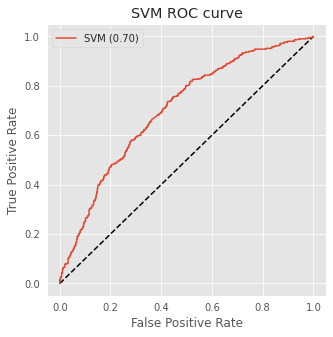

In [211]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svm,tpr_svm, label='SVM (%0.2f)' % roc_auc_score(y_test,y_svm_predict_pro))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.legend()
plt.show()

## cat boost

In [212]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 24 kB/s 


In [213]:
from catboost import CatBoostClassifier

In [214]:
catboost=CatBoostClassifier(iterations=100,learning_rate=0.03)

In [215]:
catboost.fit(X_train,y_train,verbose=10)

0:	learn: 0.6715146	total: 56.5ms	remaining: 5.59s
10:	learn: 0.4975295	total: 102ms	remaining: 825ms
20:	learn: 0.4306259	total: 146ms	remaining: 548ms
30:	learn: 0.3967764	total: 185ms	remaining: 412ms
40:	learn: 0.3728525	total: 226ms	remaining: 325ms
50:	learn: 0.3621336	total: 279ms	remaining: 268ms
60:	learn: 0.3529718	total: 318ms	remaining: 203ms
70:	learn: 0.3451975	total: 357ms	remaining: 146ms
80:	learn: 0.3376334	total: 398ms	remaining: 93.3ms
90:	learn: 0.3312222	total: 446ms	remaining: 44.1ms
99:	learn: 0.3258459	total: 491ms	remaining: 0us


In [216]:
y_catboost_pred_test=catboost.predict(X_test)
y_catboost_pred_train=catboost.predict(X_train)

In [217]:
y_catboost_pre_prob=catboost.predict_proba(X_test)[:,1]

In [218]:
catboost.score(X_test,y_test)

0.8385416666666666

In [219]:
#confusion matrix for test set
confusion_matrix(y_train,y_catboost_pred_train)

array([[2273,   53],
       [ 515, 1765]])

In [220]:
#confusion matrix for test set
confusion_matrix(y_test,y_catboost_pred_test)

array([[534,  19],
       [167, 432]])

In [221]:
validation_matrix(y_train, y_catboost_pred_train ,
                  y_test, y_catboost_pred_test ,
                  y_catboost_pre_prob,
                  model_name = "CatBoost")

scoring matrix for CatBoost
The accuracy on train data is  0.877
The accuracy on test data is  0.839
The precision on train data is  0.971
The precision on test data is  0.958
The recall on train data is  0.774
The recall on test data is  0.721
The f1-score on train data is  0.861
The f1-score on test data is  0.823
 ROC AUC score: 0.917


In [222]:
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_catboost_pre_prob)

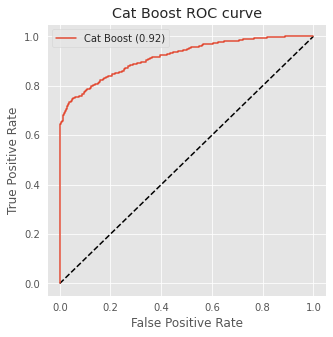

In [223]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_cat,tpr_cat, label='Cat Boost (%0.2f)' % roc_auc_score(y_test,y_catboost_pre_prob))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cat Boost ROC curve')
plt.legend()
plt.show()

##LIGHTGBM

In [227]:
import lightgbm as lgb

In [228]:
lightGBM = lgb.LGBMClassifier(silent=False)

In [229]:
#cv different parameter
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lightGBM, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)


In [230]:
light_boost = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [231]:
light_boost.best_estimator_


LGBMClassifier(max_depth=50, n_estimators=200, num_leaves=300, silent=False)

In [232]:
y_light_gbm_pred_train = light_boost.predict(X_train)
y_light_gbm_pred_test = light_boost.predict(X_test)


In [233]:
y_light_gbm_pre_prob = light_boost.predict_proba(X_test)[:,1]

In [234]:
light_boost.score(X_test,y_test)

0.9553535579190151

In [235]:
# confusion matrix for test set
confusion_matrix(y_train,y_light_gbm_pred_train )

array([[2326,    0],
       [   0, 2280]])

In [236]:
# confusion matrix for test set
confusion_matrix(y_test,y_light_gbm_pred_test )

array([[526,  27],
       [ 84, 515]])

In [237]:
validation_matrix(y_train, y_light_gbm_pred_train ,
                  y_test, y_light_gbm_pred_test ,
                  y_light_gbm_pre_prob ,
                  model_name = "Light GBM")

scoring matrix for Light GBM
The accuracy on train data is  1.0
The accuracy on test data is  0.904
The precision on train data is  1.0
The precision on test data is  0.95
The recall on train data is  1.0
The recall on test data is  0.86
The f1-score on train data is  1.0
The f1-score on test data is  0.903
 ROC AUC score: 0.955


In [238]:
fpr_lGBM, tpr_lGBM, thresholds_lGBM = roc_curve(y_test, y_light_gbm_pre_prob)

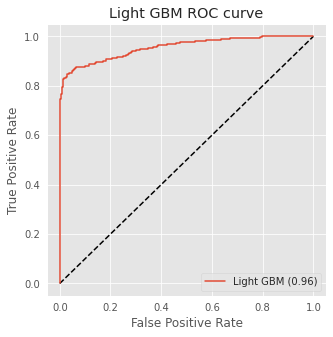

In [240]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lGBM,tpr_lGBM, label='Light GBM (%0.2f)' % roc_auc_score(y_test, y_light_gbm_pre_prob))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC curve')
plt.legend()
plt.show()

# model performance

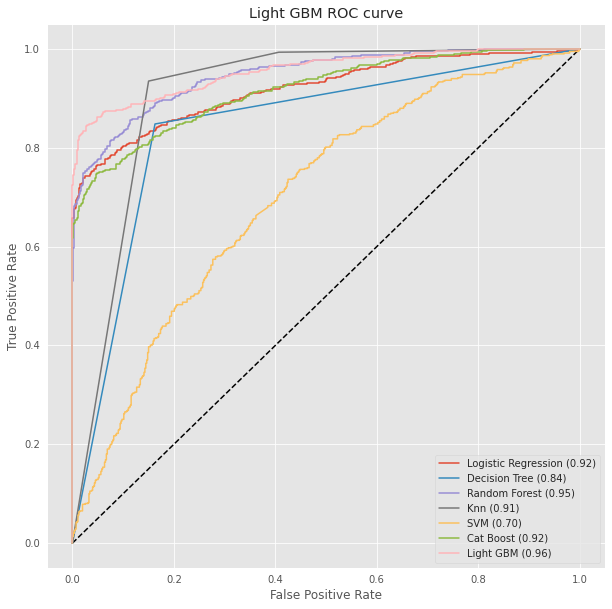

In [241]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr, label='Logistic Regression (%0.2f)' % roc_auc_score(y_test,y_lr_predict_pro))
plt.plot(fpr_dt,tpr_dt, label='Decision Tree (%0.2f)' % roc_auc_score(y_test,y_dt_predict_pro))
plt.plot(fpr_rf,tpr_rf, label='Random Forest (%0.2f)' % roc_auc_score(y_test,y_rf_predict_pro))
plt.plot(fpr_knn,tpr_knn, label='Knn (%0.2f)' % roc_auc_score(y_test,y_pred_proba))
plt.plot(fpr_svm,tpr_svm, label='SVM (%0.2f)' % roc_auc_score(y_test,y_svm_predict_pro))
plt.plot(fpr_cat,tpr_cat, label='Cat Boost (%0.2f)' % roc_auc_score(y_test,y_catboost_pre_prob))
plt.plot(fpr_lGBM,tpr_lGBM, label='Light GBM (%0.2f)' % roc_auc_score(y_test, y_light_gbm_pre_prob))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC curve')
plt.legend()
plt.show()

In [242]:
#creating dictionary to store all the metrices 
dict={'Train Accuracy':train_accuracy,'Test accuracy':test_accuracy,
      'Precision Train ':precision_train ,'Precision_Test ':precision_test ,
      'Recall Train':Recall_train,'Recall Test':Recall_test,
      'ROC AUC Test':ROC_AUC_test}

In [245]:
# list of all models
model_name=['Logistic',"Decision Tree",'Random forest','KNN',"SVM",'Cat Boost','Light GBM']

In [246]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [247]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

,Models,Train Accuracy,Test accuracy,Precision Train,Precision_Test,Recall Train,Recall Test,ROC AUC Test
0,Logistic,0.870,0.852,0.955,0.946,0.775,0.760,0.919
1,Decision Tree,1.000,0.843,1.000,0.849,1.000,0.848,0.843
2,Random forest,0.967,0.866,0.981,0.913,0.952,0.821,0.947
3,KNN,0.990,0.894,1.000,0.871,0.980,0.935,0.909
4,SVM,0.646,0.655,0.645,0.665,0.635,0.676,0.702
5,Cat Boost,0.877,0.839,0.971,0.958,0.774,0.721,0.917
6,Light GBM,1.000,0.904,1.000,0.950,1.000,0.860,0.955
